<a href="https://colab.research.google.com/github/Prayas-23/SDG-13-Urban-Heat-Risk-Analyzer-/blob/main/Urban_Heat_Risk_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated synthetic raster: 22.5–34.8 °C
{'pixels': 2500, 'hi_pixels': 170, 'extreme_pixels': 38, 'avg_temp': 26.469403014152196, 'max_temp': 34.775955318367615, 'hi_pct': 6.8, 'extreme_pct': 1.52}
Live weather for Delhi: {'time': '2025-08-08T13:45', 'interval': 900, 'temperature_2m': 35.5, 'relative_humidity_2m': 53, 'wind_speed_10m': 10.0}
AI risk level = LOW (score 0.23)


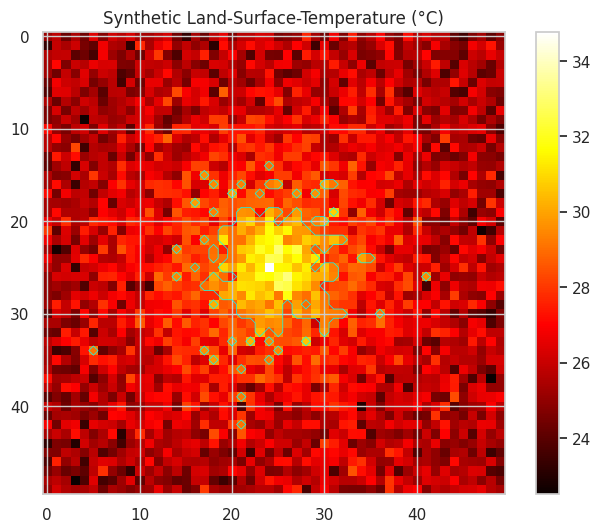

✅ Results saved: urban_heat_dashboard.json


In [ ]:
!pip -q install ibm-watson-machine-learning rasterio seaborn requests
import numpy as np, matplotlib.pyplot as plt, rasterio
import seaborn as sns, pandas as pd, json, requests, os, warnings, datetime
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="husl")
plt.rcParams["figure.figsize"] = (8, 6)
IBM_WX_APIKEY = ""
IBM_WX_URL    = "https://us-south.ml.cloud.ibm.com"
grid = 50
x = y = np.linspace(0, 10, grid)
X, Y = np.meshgrid(x, y)
center = np.sqrt((X-5)**2 + (Y-5)**2)
temperature = 25 + 8*np.exp(-center/2) + np.random.normal(0, 1, (grid, grid))
print(f"Generated synthetic raster: {temperature.min():.1f}–{temperature.max():.1f} °C")
HI_THRESH, EXTREME = 29, 31
heat_island = temperature > HI_THRESH
extreme     = temperature > EXTREME
stats = {
    "pixels": grid**2,
    "hi_pixels": int(heat_island.sum()),
    "extreme_pixels": int(extreme.sum()),
    "avg_temp": float(temperature.mean()),
    "max_temp": float(temperature.max())
}
stats["hi_pct"]       = 100*stats["hi_pixels"]/stats["pixels"]
stats["extreme_pct"]  = 100*stats["extreme_pixels"]/stats["pixels"]
print(stats)
CITY = "Delhi"
lat, lon = 28.6139, 77.2090
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current=temperature_2m,relative_humidity_2m,wind_speed_10m&timezone=auto"
wx = requests.get(url).json()["current"]
print(f"Live weather for {CITY}: {wx}")
def risk_score(tmap, weather):
    score  = 0.1*(tmap.max()-20) + 0.05*(tmap.mean()-20)
    score += 0.01*(100-weather["relative_humidity_2m"])
    score += 0.02*max(0, 5-weather["wind_speed_10m"])
    return np.clip(score/10, 0, 1)
score = risk_score(temperature, wx)
level = ["LOW","MODERATE","HIGH","EXTREME"][int(np.clip(score*4,0,3))]
print(f"AI risk level = {level} (score {score:.2f})")

actions = {
    "EXTREME":[
        "🚨 Issue immediate heat warnings",
        "❄️  Open all cooling centres",
        "🚰 Water distribution to vulnerable groups",
        "🌳 Emergency tree-watering"],
    "HIGH":[
        "⚠️  Heat advisory to public",
        "❄️  Cooling centres in affected wards",
        "🏢 Promote cool-roof subsidies"],
    "MODERATE":[
        "🟡 Monitoring & data collection",
        "🌳 Continue urban-greening programmes"],
    "LOW":[
        "🟢 Routine monitoring"]
}[level]
plt.imshow(temperature, cmap="hot"); plt.title("Synthetic Land-Surface-Temperature (°C)")
plt.colorbar(); plt.contour(heat_island, colors="cyan", linewidths=0.5)
plt.show()

dashboard = {
    "timestamp": str(datetime.datetime.utcnow()),
    "city": CITY, "coords": [lat, lon],
    "stats": stats, "weather": wx,
    "risk_level": level, "score": round(float(score),2),
    "recommendations": actions
}
with open("urban_heat_dashboard.json","w") as f: json.dump(dashboard,f,indent=2)
print("✅ Results saved: urban_heat_dashboard.json")

In [ ]:
!pip uninstall -y ibm-watson-machine-learning rasterio seaborn requests pandas numpy
!pip install ibm-watson-machine-learning rasterio seaborn==0.13.2 requests==2.32.3 pandas==2.2.2 numpy==1.26.4

Found existing installation: ibm_watson_machine_learning 1.0.368
Uninstalling ibm_watson_machine_learning-1.0.368:
  Successfully uninstalled ibm_watson_machine_learning-1.0.368
Found existing installation: rasterio 1.4.3
Uninstalling rasterio-1.4.3:
  Successfully uninstalled rasterio-1.4.3
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: requests 2.32.4
Uninstalling requests-2.32.4:
  Successfully uninstalled requests-2.32.4
Found existing installation: pandas 2.1.4
Uninstalling pandas-2.1.4:
  Successfully uninstalled pandas-2.1.4
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached ibm_watson_machine_learning-1.0.368-py3-none-any.whl.metadata (4.7 kB)
  Using cached rasterio-1.4.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.1 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB

In [ ]:
import json

# Define the filename
filename = "urban_heat_dashboard.json"

# Check if the file exists before trying to read it
if os.path.exists(filename):
    # Open and read the JSON file
    with open(filename, "r") as f:
        dashboard_data = json.load(f)

    # Display the loaded data
    print(f"Content of {filename}:")
    display(dashboard_data)
else:
    print(f"File '{filename}' not found. Please run the previous cell to generate the file.")

Content of urban_heat_dashboard.json:


{'timestamp': '2025-08-07 12:55:40.797616',
 'city': 'Delhi',
 'coords': [28.6139, 77.209],
 'stats': {'pixels': 2500,
  'hi_pixels': 185,
  'extreme_pixels': 36,
  'avg_temp': 26.498318055886926,
  'max_temp': 33.79370431184069,
  'hi_pct': 7.4,
  'extreme_pct': 1.44},
 'weather': {'time': '2025-08-07T18:15',
  'interval': 900,
  'temperature_2m': 34.8,
  'relative_humidity_2m': 48,
  'wind_speed_10m': 8.9},
 'risk_level': 'LOW',
 'score': 0.22,
 'recommendations': ['🟢 Routine monitoring']}